In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 1000
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0010_1000"
MODEL_NAME = "0010_1000-64-convsim-i"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0299
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.4778

from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/
Noisy files:20592
Nitid files:20592
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/validation/
Noisy files:5000
Nitid files:5000


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 200 )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/1000
644/644 [==============================] - 16s 15ms/step - loss: 0.0866 - val_loss: 0.0622
Epoch 2/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0683 - val_loss: 0.0603
Epoch 3/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0668 - val_loss: 0.0600
Epoch 4/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0661 - val_loss: 0.0595
Epoch 5/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0656 - val_loss: 0.0579
Epoch 6/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0653 - val_loss: 0.0577
Epoch 7/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0649 - val_loss: 0.0579
Epoch 8/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0647 - val_loss: 0.0571
Epoch 9/1000
6

644/644 [==============================] - 10s 15ms/step - loss: 0.0560 - val_loss: 0.0543
Epoch 79/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0559 - val_loss: 0.0542
Epoch 80/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0559 - val_loss: 0.0583
Epoch 81/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0559 - val_loss: 0.0529
Epoch 82/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0557 - val_loss: 0.0529
Epoch 83/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0557 - val_loss: 0.0537
Epoch 84/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0557 - val_loss: 0.0535
Epoch 85/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0557 - val_loss: 0.0516
Epoch 86/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0556 - val_loss: 0.0523
Epoch 87/1000
644/644 [==============================] - 9s 15ms/step - 

644/644 [==============================] - 9s 15ms/step - loss: 0.0537 - val_loss: 0.0548
Epoch 157/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0537 - val_loss: 0.0533
Epoch 158/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0537 - val_loss: 0.0528
Epoch 159/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0537 - val_loss: 0.0522
Epoch 160/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0536 - val_loss: 0.0521
Epoch 161/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0536 - val_loss: 0.0518
Epoch 162/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0536 - val_loss: 0.0509
Epoch 163/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0536 - val_loss: 0.0571
Epoch 164/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0535 - val_loss: 0.0539
Epoch 165/1000
644/644 [==============================] - 10s 15ms/

Epoch 234/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0525 - val_loss: 0.0521
Epoch 235/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0524 - val_loss: 0.0550
Epoch 236/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0524 - val_loss: 0.0526
Epoch 237/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0524 - val_loss: 0.0517
Epoch 238/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0524 - val_loss: 0.0509
Epoch 239/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0523 - val_loss: 0.0511
Epoch 240/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0523 - val_loss: 0.0508
Epoch 241/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0524 - val_loss: 0.0525
Epoch 242/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0523 - val_loss: 0.0550
Epoch 243/1000
644/644 [==============================

644/644 [==============================] - 9s 15ms/step - loss: 0.0514 - val_loss: 0.0531
Epoch 312/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0515 - val_loss: 0.0513
Epoch 313/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0515 - val_loss: 0.0527
Epoch 314/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0514 - val_loss: 0.0520
Epoch 315/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0515 - val_loss: 0.0513
Epoch 316/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0514 - val_loss: 0.0538
Epoch 317/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0514 - val_loss: 0.0516
Epoch 318/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0514 - val_loss: 0.0515
Epoch 319/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0514 - val_loss: 0.0508
Epoch 320/1000
644/644 [==============================] - 9s 15ms/s

Epoch 389/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0507 - val_loss: 0.0503
Epoch 390/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0507 - val_loss: 0.0532
Epoch 391/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0507 - val_loss: 0.0530
Epoch 392/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0507 - val_loss: 0.0504
Epoch 393/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0507 - val_loss: 0.0533
Epoch 394/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0507 - val_loss: 0.0505
Epoch 395/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0507 - val_loss: 0.0516
Epoch 396/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0507 - val_loss: 0.0504
Epoch 397/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0507 - val_loss: 0.0504
Epoch 398/1000
644/644 [===========================

Epoch 467/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0501 - val_loss: 0.0502
Epoch 468/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0502 - val_loss: 0.0506
Epoch 469/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0502 - val_loss: 0.0516
Epoch 470/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0501 - val_loss: 0.0496
Epoch 471/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0501 - val_loss: 0.0521
Epoch 472/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0501 - val_loss: 0.0498
Epoch 473/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0502 - val_loss: 0.0512
Epoch 474/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0502 - val_loss: 0.0519
Epoch 475/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0501 - val_loss: 0.0513
Epoch 476/1000
644/644 [===========================

644/644 [==============================] - 9s 15ms/step - loss: 0.0497 - val_loss: 0.0526
Epoch 545/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0497 - val_loss: 0.0503
Epoch 546/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0497 - val_loss: 0.0500
Epoch 547/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0497 - val_loss: 0.0506
Epoch 548/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0497 - val_loss: 0.0512
Epoch 549/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0497 - val_loss: 0.0525
Epoch 550/1000
644/644 [==============================] - 9s 14ms/step - loss: 0.0497 - val_loss: 0.0530
Epoch 551/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0497 - val_loss: 0.0515
Epoch 552/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0497 - val_loss: 0.0545
Epoch 553/1000
644/644 [==============================] - 9s 15ms/st

Epoch 622/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0494 - val_loss: 0.0512
Epoch 623/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0494 - val_loss: 0.0516
Epoch 624/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0494 - val_loss: 0.0512
Epoch 625/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0494 - val_loss: 0.0526
Epoch 626/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0493 - val_loss: 0.0497
Epoch 627/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0493 - val_loss: 0.0499
Epoch 628/1000
644/644 [==============================] - 9s 15ms/step - loss: 0.0493 - val_loss: 0.0502
Epoch 629/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0493 - val_loss: 0.0549
Epoch 630/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0493 - val_loss: 0.0515
Epoch 631/1000
644/644 [==========================

644/644 [==============================] - 10s 16ms/step - loss: 0.0490 - val_loss: 0.0496
Epoch 700/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0490 - val_loss: 0.0503
Epoch 701/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0490 - val_loss: 0.0506
Epoch 702/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0491 - val_loss: 0.0515
Epoch 703/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0490 - val_loss: 0.0496
Epoch 704/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0490 - val_loss: 0.0518
Epoch 705/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0491 - val_loss: 0.0508
Epoch 706/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0491 - val_loss: 0.0493
Epoch 707/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0490 - val_loss: 0.0493
Epoch 708/1000
644/644 [==============================] - 10s

644/644 [==============================] - 10s 15ms/step - loss: 0.0487 - val_loss: 0.0494
Epoch 777/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0488 - val_loss: 0.0509
Epoch 778/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0487 - val_loss: 0.0515
Epoch 779/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0487 - val_loss: 0.0494
Epoch 780/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0488 - val_loss: 0.0503
Epoch 781/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0488 - val_loss: 0.0500
Epoch 782/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0487 - val_loss: 0.0500
Epoch 783/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0488 - val_loss: 0.0499
Epoch 784/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0487 - val_loss: 0.0508
Epoch 785/1000
644/644 [==============================] - 10s

644/644 [==============================] - 10s 15ms/step - loss: 0.0485 - val_loss: 0.0510
Epoch 854/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0486 - val_loss: 0.0515
Epoch 855/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0485 - val_loss: 0.0498
Epoch 856/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0485 - val_loss: 0.0497
Epoch 857/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0485 - val_loss: 0.0513
Epoch 858/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0485 - val_loss: 0.0508
Epoch 859/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0485 - val_loss: 0.0508
Epoch 860/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0485 - val_loss: 0.0522
Epoch 861/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0485 - val_loss: 0.0513
Epoch 862/1000
644/644 [==============================] - 10s

644/644 [==============================] - 10s 15ms/step - loss: 0.0483 - val_loss: 0.0495
Epoch 931/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0483 - val_loss: 0.0487
Epoch 932/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0483 - val_loss: 0.0513
Epoch 933/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0483 - val_loss: 0.0502
Epoch 934/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0483 - val_loss: 0.0504
Epoch 935/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0483 - val_loss: 0.0496
Epoch 936/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0483 - val_loss: 0.0501
Epoch 937/1000
644/644 [==============================] - 10s 16ms/step - loss: 0.0484 - val_loss: 0.0500
Epoch 938/1000
644/644 [==============================] - 10s 15ms/step - loss: 0.0483 - val_loss: 0.0495
Epoch 939/1000
644/644 [==============================] - 10s

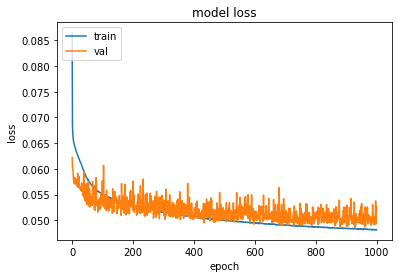

In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-i\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Black image found
Images count =5000
Best RMSENZ  =4482 (0.90)
Best MAENZ   =4506 (0.90)
Best Accuracy=4373 (0.87)
RMSE-NZ  Pred=0.0634  Noisy=0.1566
MAE-NZ   Pred=0.0536  Noisy=0.1486
PSNR     Pred=11.6 dB Noisy=6.9 dB
Accuracy Pred=0.25    Noisy=0.11
SSM      Pred=0.84    Noisy=0.51
HOG MSE  Pred=0.17    Noisy=0.21


Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_0_nitid_idx076.tif


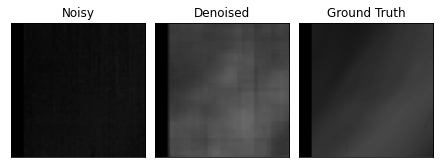

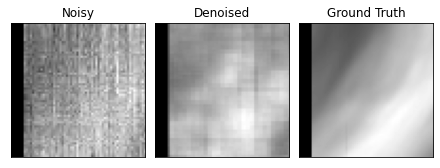

RMSE-NZ  Pred=0.0936  Noisy=0.1435 BEST
MAE-NZ   Pred=0.0848  Noisy=0.1359 BEST
PSNR     Pred=9.5 dB Noisy=5.8 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.80    Noisy=0.31
HOG MSE  Pred=0.07    Noisy=0.17
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_3_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_3_nitid_idx076.tif


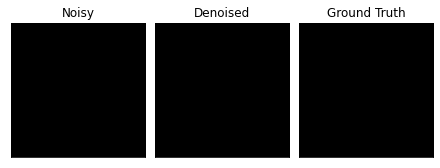

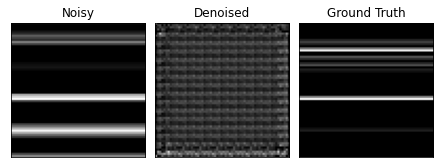

RMSE-NZ  Pred=0.0002  Noisy=0.0000 WORST
MAE-NZ   Pred=0.0002  Noisy=0.0000 WORST
PSNR     Pred=-67.0 dB Noisy=10.9 dB WORST
Accuracy Pred=1.00    Noisy=1.00 WORST
SSM      Pred=1.00    Noisy=1.00
HOG MSE  Pred=0.44    Noisy=0.00
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_4_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_4_nitid_idx076.tif


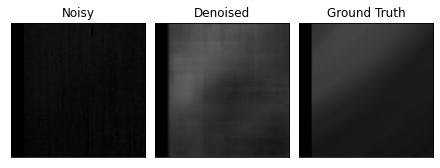

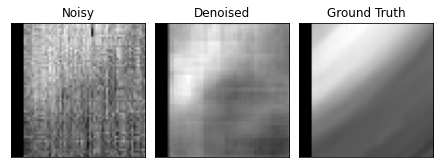

RMSE-NZ  Pred=0.0740  Noisy=0.1196 BEST
MAE-NZ   Pred=0.0676  Noisy=0.1070 BEST
PSNR     Pred=11.4 dB Noisy=7.2 dB BEST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.83    Noisy=0.32
HOG MSE  Pred=0.11    Noisy=0.12
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_8_nitid_idx076.tif


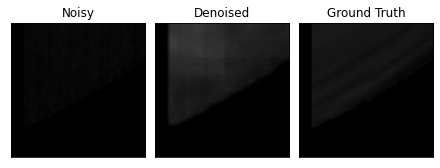

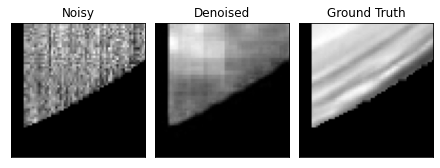

RMSE-NZ  Pred=0.0499  Noisy=0.0426 WORST
MAE-NZ   Pred=0.0319  Noisy=0.0346 BEST
PSNR     Pred=6.1 dB Noisy=7.5 dB WORST
Accuracy Pred=0.47    Noisy=0.29 BEST
SSM      Pred=0.87    Noisy=0.64
HOG MSE  Pred=0.12    Noisy=0.07
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_4_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_4_nitid_idx076.tif


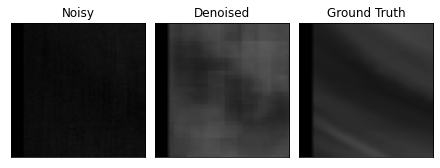

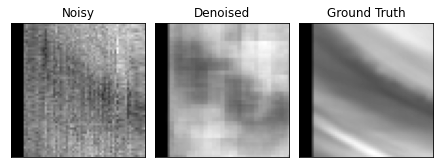

RMSE-NZ  Pred=0.0730  Noisy=0.1179 BEST
MAE-NZ   Pred=0.0664  Noisy=0.1105 BEST
PSNR     Pred=11.5 dB Noisy=7.3 dB BEST
Accuracy Pred=0.05    Noisy=0.00 BEST
SSM      Pred=0.81    Noisy=0.34
HOG MSE  Pred=0.13    Noisy=0.13
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_5_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_5_nitid_idx076.tif


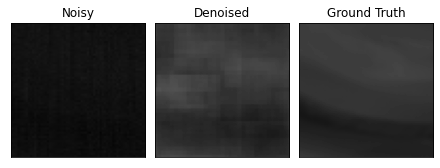

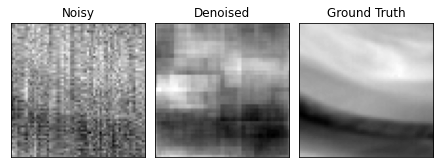

RMSE-NZ  Pred=0.0374  Noisy=0.1383 BEST
MAE-NZ   Pred=0.0286  Noisy=0.1327 BEST
PSNR     Pred=17.1 dB Noisy=5.8 dB BEST
Accuracy Pred=0.25    Noisy=0.00 BEST
SSM      Pred=0.87    Noisy=0.48
HOG MSE  Pred=0.21    Noisy=0.41
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_nitid_idx076.tif


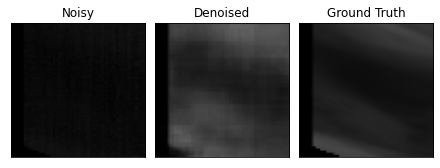

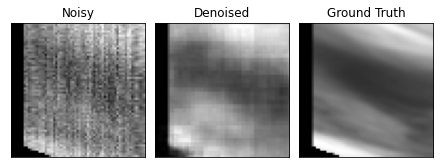

RMSE-NZ  Pred=0.0848  Noisy=0.0976 BEST
MAE-NZ   Pred=0.0768  Noisy=0.0842 BEST
PSNR     Pred=10.3 dB Noisy=9.1 dB BEST
Accuracy Pred=0.05    Noisy=0.00 BEST
SSM      Pred=0.78    Noisy=0.32
HOG MSE  Pred=0.13    Noisy=0.23
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0073_03_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0073_03_00_15_nitid_idx076.tif


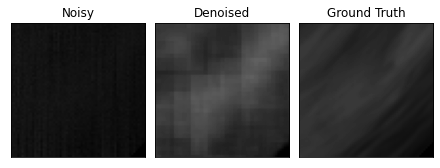

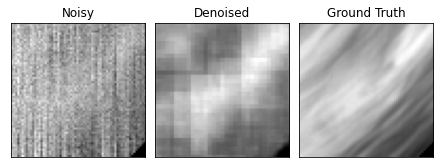

RMSE-NZ  Pred=0.0790  Noisy=0.1050 BEST
MAE-NZ   Pred=0.0691  Noisy=0.0981 BEST
PSNR     Pred=10.0 dB Noisy=7.5 dB BEST
Accuracy Pred=0.06    Noisy=0.02 BEST
SSM      Pred=0.73    Noisy=0.41
HOG MSE  Pred=0.25    Noisy=0.28
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_0_nitid_idx076.tif


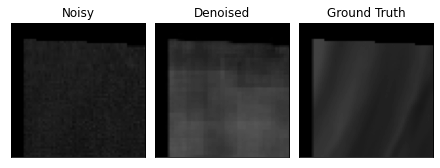

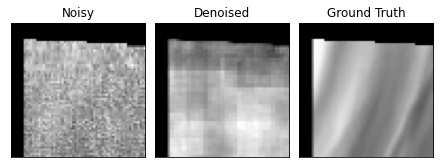

RMSE-NZ  Pred=0.0875  Noisy=0.0621 WORST
MAE-NZ   Pred=0.0675  Noisy=0.0529 WORST
PSNR     Pred=9.5 dB Noisy=12.5 dB WORST
Accuracy Pred=0.23    Noisy=0.08 BEST
SSM      Pred=0.77    Noisy=0.65
HOG MSE  Pred=0.13    Noisy=0.15
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_00_11_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_00_11_nitid_idx076.tif


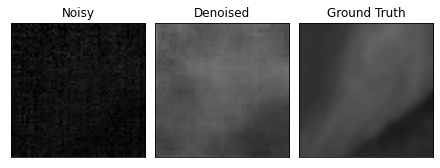

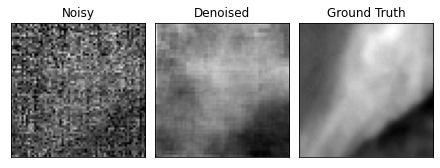

RMSE-NZ  Pred=0.0906  Noisy=0.2089 BEST
MAE-NZ   Pred=0.0767  Noisy=0.1976 BEST
PSNR     Pred=13.0 dB Noisy=5.8 dB BEST
Accuracy Pred=0.04    Noisy=0.00 BEST
SSM      Pred=0.74    Noisy=0.21
HOG MSE  Pred=0.12    Noisy=0.23
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_10_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_10_nitid_idx076.tif


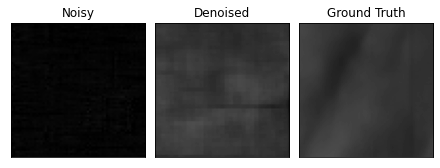

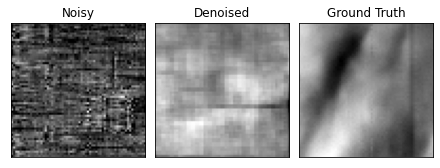

RMSE-NZ  Pred=0.0376  Noisy=0.1921 BEST
MAE-NZ   Pred=0.0307  Noisy=0.1894 BEST
PSNR     Pred=17.9 dB Noisy=3.7 dB BEST
Accuracy Pred=0.19    Noisy=0.00 BEST
SSM      Pred=0.79    Noisy=0.15
HOG MSE  Pred=0.20    Noisy=0.25
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_3_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_3_nitid_idx076.tif


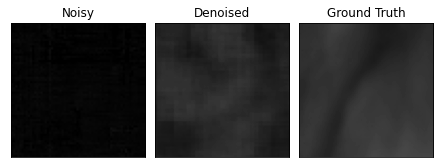

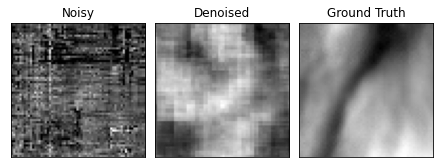

RMSE-NZ  Pred=0.0653  Noisy=0.1794 BEST
MAE-NZ   Pred=0.0543  Noisy=0.1760 BEST
PSNR     Pred=12.6 dB Noisy=3.8 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.74    Noisy=0.21
HOG MSE  Pred=0.24    Noisy=0.24
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_9_nitid_idx076.tif


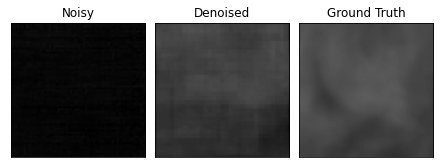

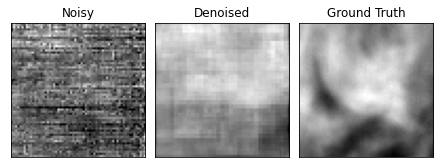

RMSE-NZ  Pred=0.0704  Noisy=0.2648 BEST
MAE-NZ   Pred=0.0616  Noisy=0.2625 BEST
PSNR     Pred=14.2 dB Noisy=2.7 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.80    Noisy=0.19
HOG MSE  Pred=0.10    Noisy=0.16
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0261_04_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0261_04_00_8_nitid_idx076.tif


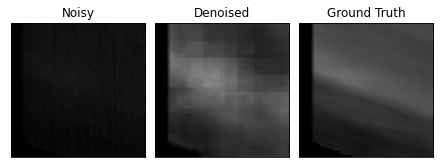

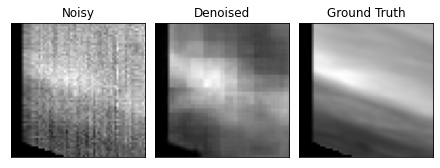

RMSE-NZ  Pred=0.0693  Noisy=0.1889 BEST
MAE-NZ   Pred=0.0579  Noisy=0.1739 BEST
PSNR     Pred=15.5 dB Noisy=6.8 dB BEST
Accuracy Pred=0.13    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.35
HOG MSE  Pred=0.10    Noisy=0.15
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0261_04_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0261_04_01_9_nitid_idx076.tif


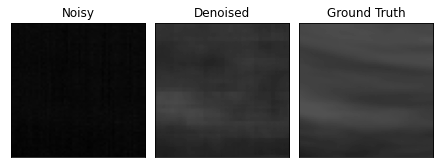

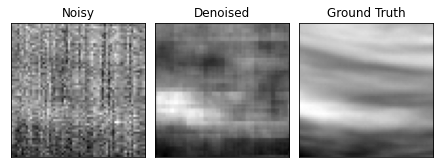

RMSE-NZ  Pred=0.0614  Noisy=0.2131 BEST
MAE-NZ   Pred=0.0536  Noisy=0.2098 BEST
PSNR     Pred=14.4 dB Noisy=3.6 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.92    Noisy=0.31
HOG MSE  Pred=0.13    Noisy=0.45
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )